# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy import stats
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
print(weather_api_key)

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

83989eb20c47c3e71d71dc7dd52bf32f


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")
print(cities)

Number of cities in the list: 602
['sandnessjoen', 'blackmans bay', 'lebu', 'laurel', 'remire-montjoly', 'puerto natales', 'ta`u', 'papatowai', 'gueltat zemmour', 'atchison', 'masuguru', 'esquel', 'adamstown', 'vila velha', 'nantucket', 'port blair', 'taiohae', 'grytviken', 'prado', 'waitangi', 'fisterra', 'yellowknife', 'kerikeri', 'ribeira grande', 'bathurst', 'bredasdorp', 'bilibino', 'vorgashor', 'port-aux-francais', 'behompy', 'alice springs', 'valle aurina - ahrntal', 'mezhdurechensk', 'margaret river', 'talnakh', 'dudinka', 'la ronge', 'labrador city', 'edinburgh of the seven seas', 'jiaozhou', 'pacific grove', 'mollendo', 'atafu village', 'port alfred', 'invercargill', 'saint-joseph', 'isafjordur', 'ilulissat', 'aykhal', 'katsuren-haebaru', 'loa janan', 'murun-kuren', 'katsuura', 'kingston', 'san pedro pochutla', 'ar ruways', 'devinuwara', 'petropavlovsk-kamchatsky', 'tolanaro', 'cabo san lucas', 'tafuna', 'tiksi', 'albany', 'yei', 'edmundston', 'yamba', 'bengkulu', 'amga', 'sa

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
from pprint import pprint

# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#Making units in Celsius since starter code graphs are in Celsius
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
#print(query_url)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = query_url + city
    #print(city_url)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = requests.get(city_url)
        city_weather_json = requests.get(query_url + city).json()
        #pprint(city_weather_json)
        
        #Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_json["coord"]["lat"]
        city_lng = city_weather_json['coord']['lon']
        city_max_temp = city_weather_json['main']['temp_max']
        city_humidity = city_weather_json['main']['humidity']
        city_clouds = city_weather_json['clouds']['all']
        city_wind = city_weather_json['wind']['speed']
        city_country = city_weather_json["sys"]["country"]
        city_date = city_weather_json['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    
    # If an error is experienced, skip the city
    except: 
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sandnessjoen
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | laurel
Processing Record 5 of Set 1 | remire-montjoly
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | ta`u
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | gueltat zemmour
City not found. Skipping...
Processing Record 10 of Set 1 | atchison
Processing Record 11 of Set 1 | masuguru
Processing Record 12 of Set 1 | esquel
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | vila velha
Processing Record 15 of Set 1 | nantucket
Processing Record 16 of Set 1 | port blair
Processing Record 17 of Set 1 | taiohae
City not found. Skipping...
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | prado
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | fisterra
Processing 

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()
#city_data_df

City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sandnessjoen,66.0217,12.6316,16.29,88,75,2.57,NO,1691166835
1,blackmans bay,-43.0167,147.3167,11.07,70,97,6.92,AU,1691166835
2,lebu,-37.6167,-73.6500,11.96,55,25,7.08,CL,1691166756
3,laurel,39.0993,-76.8483,26.44,77,100,2.06,US,1691166835
4,remire-montjoly,4.9167,-52.2667,32.02,66,75,4.63,GF,1691166835


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,16.29,88,75,2.57,NO,1691166835
1,blackmans bay,-43.0167,147.3167,11.07,70,97,6.92,AU,1691166835
2,lebu,-37.6167,-73.6500,11.96,55,25,7.08,CL,1691166756
3,laurel,39.0993,-76.8483,26.44,77,100,2.06,US,1691166835
4,remire-montjoly,4.9167,-52.2667,32.02,66,75,4.63,GF,1691166835


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

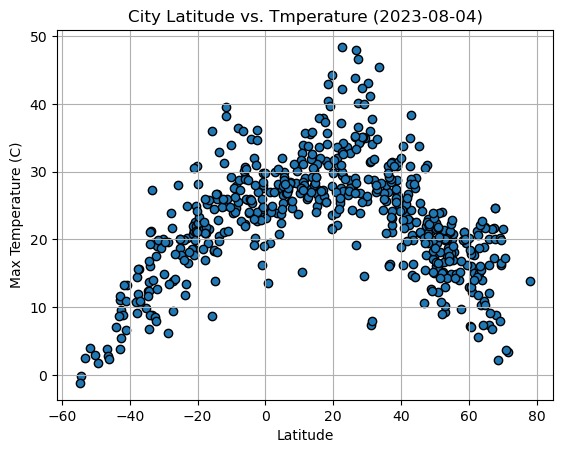

In [10]:
from datetime import datetime
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Tmperature ({datetime.today().strftime('%Y-%m-%d')})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

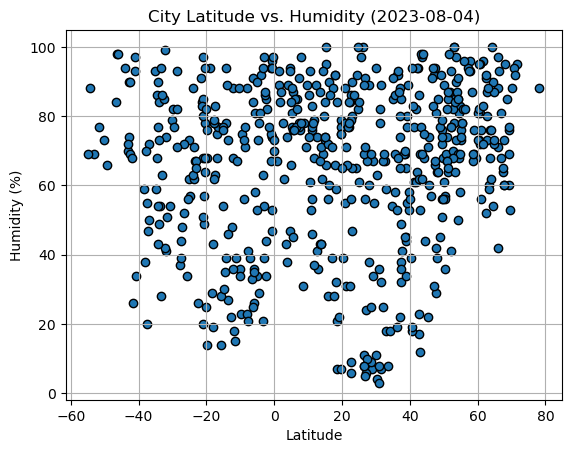

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({datetime.today().strftime('%Y-%m-%d')})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

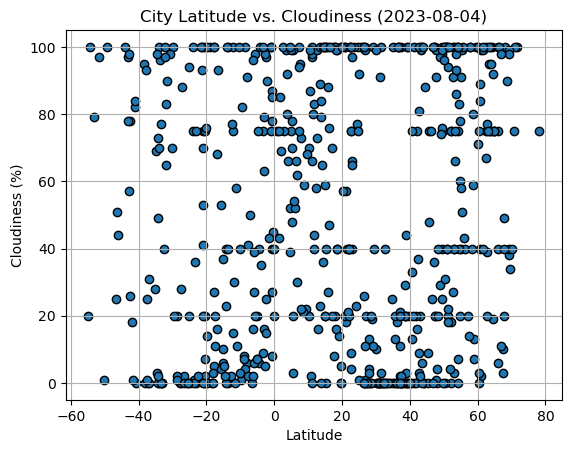

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({datetime.today().strftime('%Y-%m-%d')})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

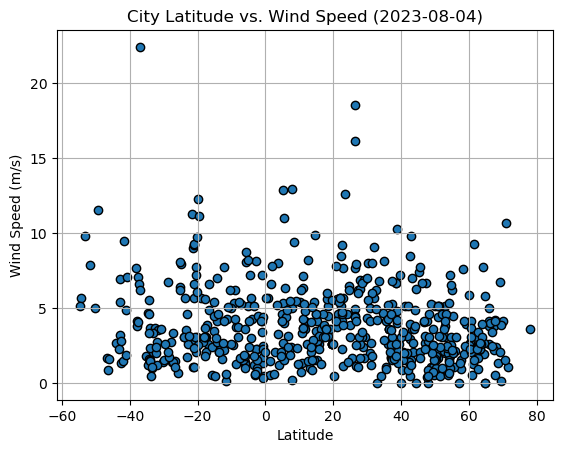

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({datetime.today().strftime('%Y-%m-%d')})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, x_label, y_label, eq_x_position, eq_y_position, rval_x_position, rval_y_position):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    # Get regression values
    regress_values = x_values * slope + intercept
    #print(regress_values)
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    print(f"Line equation: {line_eq}")
    # Create Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    # Label plot and annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq,(eq_x_position, eq_y_position),fontsize=12,color="red")
    # Print r value
    print(f"R-value: {rvalue**2}")
    plt.text(rval_x_position, rval_y_position, f"The r-value is {rvalue**2}", fontsize=10)
    # Show plot
    plt.show()

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sandnessjoen,66.0217,12.6316,16.29,88,75,2.57,NO,1691166835
3,laurel,39.0993,-76.8483,26.44,77,100,2.06,US,1691166835
4,remire-montjoly,4.9167,-52.2667,32.02,66,75,4.63,GF,1691166835
8,atchison,39.5630,-95.1216,26.02,89,100,2.58,US,1691166836
13,nantucket,41.2835,-70.0995,23.94,61,0,5.14,US,1691166599


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,blackmans bay,-43.0167,147.3167,11.07,70,97,6.92,AU,1691166835
2,lebu,-37.6167,-73.6500,11.96,55,25,7.08,CL,1691166756
5,puerto natales,-51.7236,-72.4875,3.92,77,97,7.88,CL,1691166836
6,ta`u,-14.2336,-169.5144,26.70,78,23,7.03,AS,1691166836
7,papatowai,-46.5619,169.4708,3.88,84,25,1.69,NZ,1691166836


###  Temperature vs. Latitude Linear Regression Plot

Line equation: y = -0.26x +33.82
R-value: 0.3912939869742802


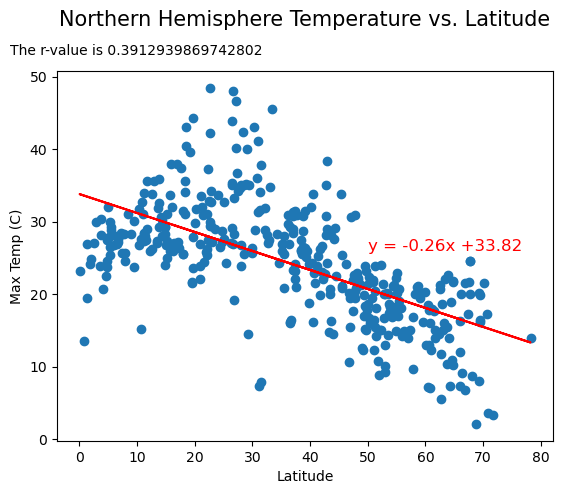

In [38]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
plt.title('Northern Hemisphere Temperature vs. Latitude', x= 0.5, y=1.1, fontsize=15)
linear_regression(x_values, y_values, 'Latitude', 'Max Temp (C)',50,26,-12,53)
plt.show()

Line equation: y = 0.48x +30.04
R-value: 0.6523814911525527


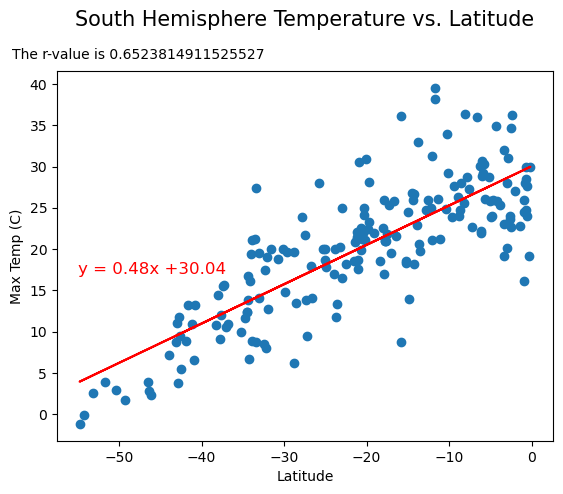

In [45]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plt.title('South Hemisphere Temperature vs. Latitude', x= 0.5, y=1.1, fontsize=15)
linear_regression(x_values, y_values, 'Latitude', 'Max Temp (C)',-55,17,-63,43)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

Line equation: y = 0.17x +61.27
R-value: 0.019091945730075718


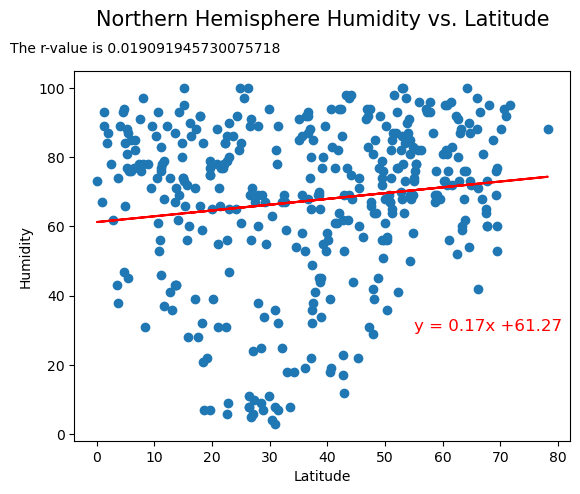

In [46]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
plt.title('Northern Hemisphere Humidity vs. Latitude', x= 0.5, y=1.1, fontsize=15)
linear_regression(x_values, y_values, 'Latitude', 'Humidity',55,30,-15, 110)

Line equation: y = -0.22x +58.83
R-value: 0.01765561242152259


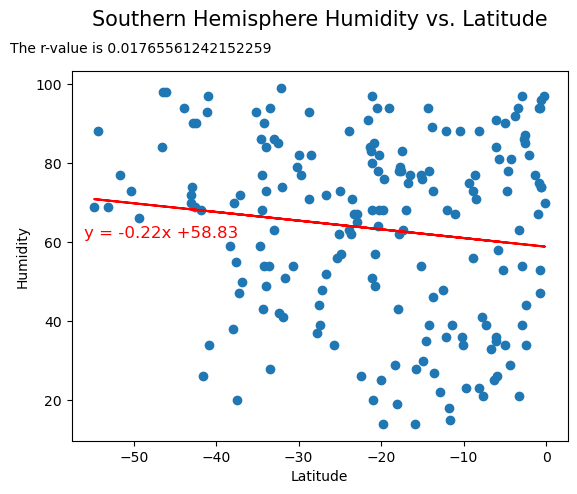

In [48]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
plt.title('Southern Hemisphere Humidity vs. Latitude', x= 0.5, y=1.1, fontsize=15)
linear_regression(x_values, y_values, 'Latitude', 'Humidity',-56,61,-65, 108)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

Line equation: y = 0.04x +49.73
R-value: 0.00043097438909315785


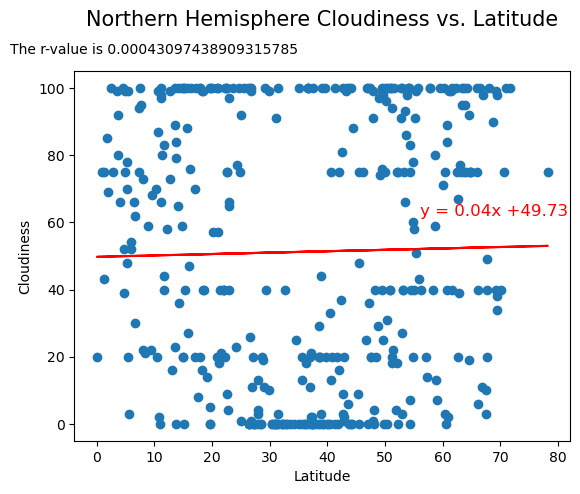

In [50]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plt.title('Northern Hemisphere Cloudiness vs. Latitude', x= 0.5, y=1.1, fontsize=15)
linear_regression(x_values, y_values, 'Latitude', 'Cloudiness',56,62,-15, 110)

Line equation: y = -0.15x +40.87
R-value: 0.002839711716320379


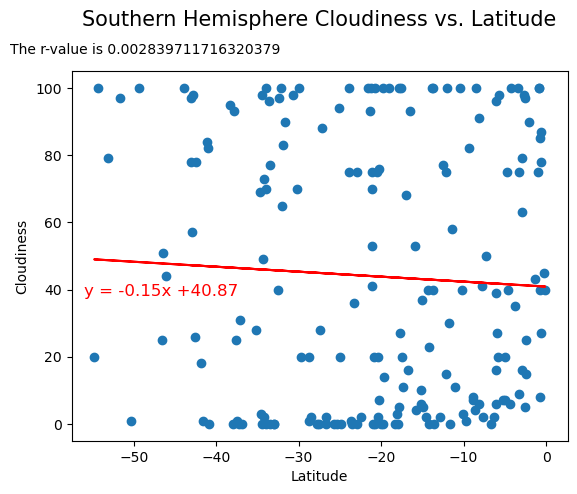

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
plt.title('Southern Hemisphere Cloudiness vs. Latitude', x= 0.5, y=1.1, fontsize=15)
linear_regression(x_values, y_values, 'Latitude', 'Cloudiness',-56,38,-65, 110)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

Line equation: y = -0.03x +4.74
R-value: 0.04722195091769603


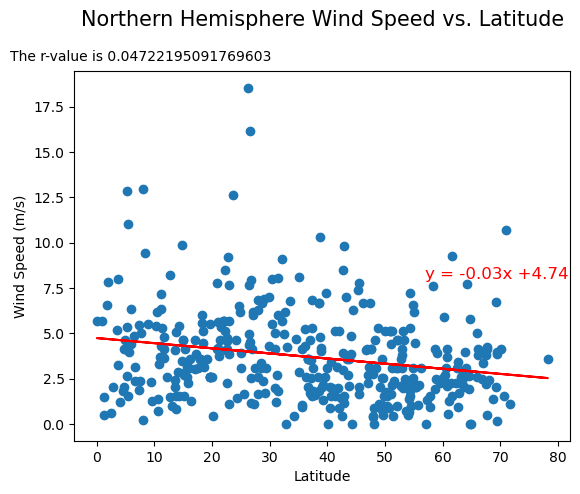

In [58]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
plt.title('Northern Hemisphere Wind Speed vs. Latitude', x= 0.5, y=1.1, fontsize=15)
linear_regression(x_values, y_values, 'Latitude', 'Wind Speed (m/s)',57,8,-15,20)

Line equation: y = -0.03x +3.28
R-value: 0.022422910452155866


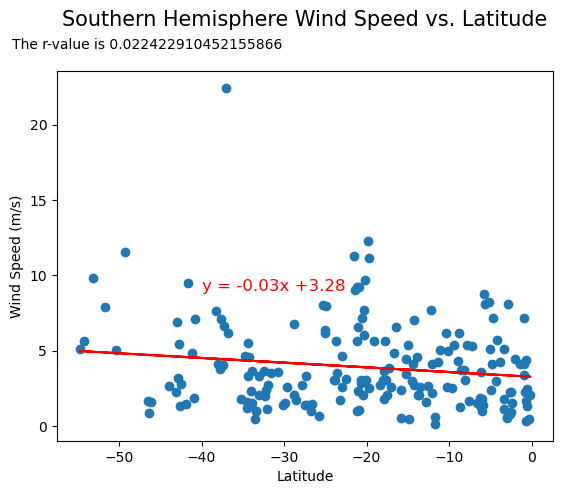

In [73]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
plt.title('Southern Hemisphere Wind Speed vs. Latitude', x= 0.5, y=1.1, fontsize=15)
linear_regression(x_values, y_values, 'Latitude', 'Wind Speed (m/s)',-40,9,-63, 25)

**Discussion about the linear relationship:** YOUR RESPONSE HERE